## Data Analytics - Lab 6 - Model comparison
<br>
Jan Pomykacz<br>
Nr. albumu: 401623<br>
Grupa: czwartek, 9:30

In [52]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

### Generating data

In [53]:
F = 3
L = 8
N = (L+F)*100

model_data1=CmdStanModel(stan_file='code_1.stan')

data1 = model_data1.sample(data={"N":N},
                           iter_sampling=1,
                           iter_warmup=0,
                           chains=1,
                           fixed_param=True,
                           seed=26042023,
                           )
data1_pd = data1.draws_pd()
data1_pd = data1_pd.iloc[:,3:]
data1_pd

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],...,y[1091],y[1092],y[1093],y[1094],y[1095],y[1096],y[1097],y[1098],y[1099],y[1100]
0,0.264602,-0.024155,-0.78435,-1.74902,-1.29113,0.164387,-0.253011,0.38029,0.364704,-0.074319,...,0.581801,1.34872,1.1278,1.96987,0.340031,-0.056781,2.41593,1.33864,-0.741054,-0.423614


In [54]:
model_data2=CmdStanModel(stan_file='code_2.stan')

data2 = model_data2.sample(data={"N":N},
                           iter_sampling=1,
                           iter_warmup=0,
                           chains=1,
                           fixed_param=True,
                           seed=26042023,
                           )
data2_pd = data2.draws_pd()
# data2_pd = data2_pd.iloc[:,3305:]
data2_pd

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1091],y[1092],y[1093],y[1094],y[1095],y[1096],y[1097],y[1098],y[1099],y[1100]
0,0.0,0.0,0.264602,-0.697318,-0.199312,-0.766254,1.70363,-1.29113,0.047581,-1.41489,...,-0.689456,1.69937,-3.2353,1.05917,1.78001,-2.77441,-3.40868,2.92994,-1.6949,-0.239267


### Comparison of above data for normal and student model

In [55]:
model_normal=CmdStanModel(stan_file='code_3.stan')

normal_data1 = model_normal.sample(data={"N":N, "y":data1_pd.iloc[0,:]},
                           seed=26042023,
                           )

model_student=CmdStanModel(stan_file='code_4.stan')

student_data1 = model_student.sample(data={"N":N, "y":data1_pd.iloc[0,:]},
                           seed=26042023,
                           )

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                   


INFO:cmdstanpy:CmdStan done processing.


#### Creating arviz InferenceData from sampled data for comparison purposes

In [56]:
normal1_az = az.from_cmdstanpy(
    posterior=normal_data1,
)

student1_az = az.from_cmdstanpy(
    posterior=student_data1,
)

#### Comparison

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
student_1,0,-1650.436543,5.456723,0.000000,1.0,38.872017,0.000000,False,log
normal_1,1,-2299.435776,56.341083,648.999233,0.0,206.059594,178.170662,True,log


Text(0.5, 1.0, 'Comparison of models with LOO criterion')

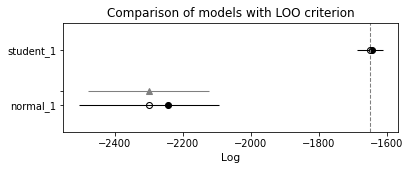

In [57]:
compare_dict = {"normal_1": normal1_az, "student_1": student1_az}

loo_diff = az.compare(compare_dict=compare_dict, ic="loo")
display(loo_diff)

ax = az.plot_compare(loo_diff)
ax.set_title("Comparison of models with LOO criterion")

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
student_1,0,-1650.386422,5.406602,0.000000,1.0,38.853921,0.000000,True,log
normal_1,1,-2312.164175,69.069482,661.777753,0.0,213.566398,185.821256,True,log


Text(0.5, 1.0, 'Comparison of models with WAIC criterion')

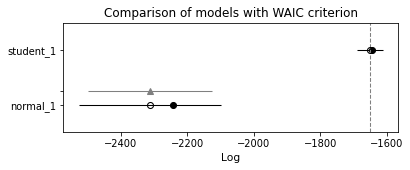

In [58]:
compare_dict = {"normal_1": normal1_az, "student_1": student1_az}

waic_diff = az.compare(compare_dict=compare_dict, ic="waic")
display(waic_diff)

ax = az.plot_compare(waic_diff)
ax.set_title("Comparison of models with WAIC criterion")

Using both criteria we see that student model is better for predicting new data (smaller elpd values).

#### Comparison with different predictors

In [59]:
model_predictors=CmdStanModel(stan_file='code_5.stan')

predictors_1 = model_predictors.sample(data={"N":N, "K": 1, "y":np.array(data2_pd.iloc[:,3305:]).reshape(N), "X": np.array(data2_pd.iloc[:,2:1102]).reshape(N,1)},
                           seed=26042023,
                           )

predictors_2 = model_predictors.sample(data={"N":N, "K": 2, "y":np.array(data2_pd.iloc[:,3305:]).reshape(N), "X": np.array([data2_pd.iloc[:,2:1102], data2_pd.iloc[:,1102:2202]]).reshape(N,2)},
                           seed=26042023,
                           )

predictors_3 = model_predictors.sample(data={"N":N, "K": 3, "y":np.array(data2_pd.iloc[:,3305:]).reshape(N), "X": np.array([data2_pd.iloc[:,2:1102], data2_pd.iloc[:,1102:2202], data2_pd.iloc[:,2202:3302]]).reshape(N,3)},
                           seed=26042023,
                           )

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling completed                


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)





chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:04 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling complet


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed 


INFO:cmdstanpy:CmdStan done processing.


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
one pred,0,-2067.339308,2.057237,0.000000,1.000000e+00,23.669071,0.000000,False,log
three pred,1,-2567.268957,3.915882,499.929649,1.061491e-13,23.811729,25.815991,False,log
two pred,2,-2567.305586,2.998637,499.966278,0.000000e+00,23.712660,25.672244,False,log


Text(0.5, 1.0, 'Comparison of model with LOO criterion - variable predictors number')

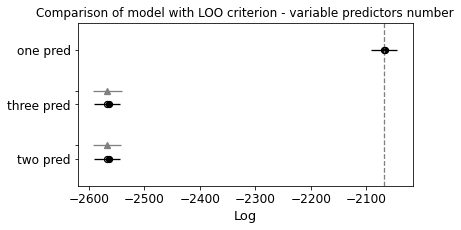

In [60]:
#loo comparison
compd_dict = {"one pred": az.from_cmdstanpy(posterior=predictors_1), "two pred": az.from_cmdstanpy(posterior=predictors_2), "three pred": az.from_cmdstanpy(posterior=predictors_3)}
loo_preds = az.compare(compd_dict, ic="loo")

display(loo_preds)

ax = az.plot_compare(loo_preds)
ax.set_title("Comparison of model with LOO criterion - variable predictors number")

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
one pred,0,-2067.339443,2.057372,0.000000,1.000000e+00,23.669094,0.000000,False,log
three pred,1,-2567.269017,3.915942,499.929574,0.000000e+00,23.811756,25.816021,False,log
two pred,2,-2567.305483,2.998534,499.966040,8.972090e-09,23.712621,25.672249,False,log


Text(0.5, 1.0, 'Comparison of model with WAIC criterion - variable predictors number')

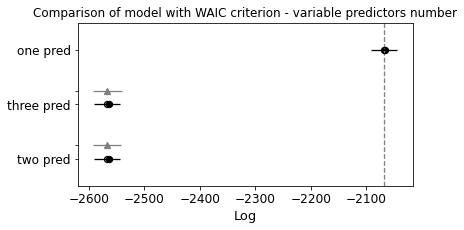

In [61]:
#waic comparison
waic_preds = az.compare(compd_dict, ic="waic")

display(waic_preds)

ax = az.plot_compare(waic_preds)
ax.set_title("Comparison of model with WAIC criterion - variable predictors number")

For one predictor model behaves best, for two and three it's similar for both criteria.